## SETUP

In [78]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_theme(style="ticks")

In [79]:
PATH_GDP = "datasets/gdpset.csv"
PATH_LIFESET = "datasets/lifeset.csv"

## PREPARANDO DATASETS

In [80]:
def get_dataframe_from(path:str) -> pd.DataFrame:
    dataframe = pd.read_csv(path)
    return dataframe

In [81]:
def normalize_column(df, column_name):
    df_normalized = df.copy()
    min_value = df_normalized[column_name].min()
    max_value = df_normalized[column_name].max()
    df_normalized[column_name + '_norm'] = (df_normalized[column_name] - min_value) / (max_value - min_value)
    return df_normalized

### PIB

In [82]:
df_pib = get_dataframe_from(path=PATH_GDP)
df_pib.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43 entries, 0 to 42
Data columns (total 34 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   STRUCTURE                 43 non-null     object 
 1   STRUCTURE_ID              43 non-null     object 
 2   STRUCTURE_NAME            43 non-null     object 
 3   ACTION                    43 non-null     object 
 4   REF_AREA                  43 non-null     object 
 5   Reference area            43 non-null     object 
 6   FREQ                      43 non-null     object 
 7   Frequency of observation  43 non-null     object 
 8   MEASURE                   43 non-null     object 
 9   Measure                   43 non-null     object 
 10  ACTIVITY                  43 non-null     object 
 11  Economic activity         43 non-null     object 
 12  UNIT_MEASURE              43 non-null     object 
 13  Unit of measure           43 non-null     object 
 14  PRICE_BASE  

In [83]:
df_pib.head(3)

,STRUCTURE,STRUCTURE_ID,STRUCTURE_NAME,ACTION,REF_AREA,Reference area,FREQ,Frequency of observation,MEASURE,Measure,...,OBS_VALUE,Observation value,OBS_STATUS,Observation status,UNIT_MULT,Unit multiplier,BASE_PER,Base period,DECIMALS,Decimals
0,DATAFLOW,OECD.SDD.TPS:DSD_PDB@DF_PDB_LV(1.0),Productivity levels,I,PRT,Portugal,A,Annual,GDPPOP,GDP per capita,...,49744.991301,NaN,P,Provisional value,0,Units,NaN,NaN,2,Two
1,DATAFLOW,OECD.SDD.TPS:DSD_PDB@DF_PDB_LV(1.0),Productivity levels,I,CZE,Czechia,A,Annual,GDPPOP,GDP per capita,...,55803.217068,NaN,A,Normal value,0,Units,NaN,NaN,2,Two
2,DATAFLOW,OECD.SDD.TPS:DSD_PDB@DF_PDB_LV(1.0),Productivity levels,I,GRC,Greece,A,Annual,GDPPOP,GDP per capita,...,40521.058441,NaN,P,Provisional value,0,Units,NaN,NaN,2,Two


Selecionando e renomeando as colunas que serão utilizadas na análise

In [84]:
df_pib = df_pib[['REF_AREA', 'Reference area', 'OBS_VALUE']]
df_pib.rename({'REF_AREA': 'sigla_pais', 'Reference area': 'nome_pais', 'OBS_VALUE': 'pib_per_capita'}, axis=1, inplace=True)
df_pib.head(3)

,sigla_pais,nome_pais,pib_per_capita
0,PRT,Portugal,49744.991301
1,CZE,Czechia,55803.217068
2,GRC,Greece,40521.058441


### FELICIDADE

In [85]:
df_life = get_dataframe_from(path=PATH_LIFESET)
df_life.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   STRUCTURE              208 non-null    object 
 1   STRUCTURE_ID           208 non-null    object 
 2   STRUCTURE_NAME         208 non-null    object 
 3   ACTION                 208 non-null    object 
 4   LOCATION               208 non-null    object 
 5   Country                208 non-null    object 
 6   INDICATOR              208 non-null    object 
 7   Indicator              208 non-null    object 
 8   MEASURE                208 non-null    object 
 9   Measure                208 non-null    object 
 10  INEQUALITY             208 non-null    object 
 11  Inequality             0 non-null      float64
 12  OBS_VALUE              208 non-null    float64
 13  Observation Value      0 non-null      float64
 14  OBS_STATUS             208 non-null    object 
 15  Observ

In [86]:
df_life

,STRUCTURE,STRUCTURE_ID,STRUCTURE_NAME,ACTION,LOCATION,Country,INDICATOR,Indicator,MEASURE,Measure,...,OBS_VALUE,Observation Value,OBS_STATUS,Observation Status,UNIT_MEASURE,Unit of Measures,UNIT_MULT,Multiplier,BASE_PER,Base reference period
0,DATAFLOW,OECD:DF_BLI(1.0),Better Life Index,I,AUS,Australia,SW_LIFS,Life satisfaction,L,Value,...,7.1,NaN,A,NaN,AVSCORE,Average score,0,Units,NaN,NaN
1,DATAFLOW,OECD:DF_BLI(1.0),Better Life Index,I,AUT,Austria,SW_LIFS,Life satisfaction,L,Value,...,7.2,NaN,A,NaN,AVSCORE,Average score,0,Units,NaN,NaN
2,DATAFLOW,OECD:DF_BLI(1.0),Better Life Index,I,BEL,Belgium,SW_LIFS,Life satisfaction,L,Value,...,6.8,NaN,A,NaN,AVSCORE,Average score,0,Units,NaN,NaN
3,DATAFLOW,OECD:DF_BLI(1.0),Better Life Index,I,CAN,Canada,SW_LIFS,Life satisfaction,L,Value,...,7.0,NaN,A,NaN,AVSCORE,Average score,0,Units,NaN,NaN
4,DATAFLOW,OECD:DF_BLI(1.0),Better Life Index,I,CZE,Czechia,SW_LIFS,Life satisfaction,L,Value,...,6.9,NaN,A,NaN,AVSCORE,Average score,0,Units,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,DATAFLOW,OECD:DF_BLI(1.0),Better Life Index,I,CRI,Costa Rica,SW_LIFS,Life satisfaction,L,Value,...,6.3,NaN,A,NaN,AVSCORE,Average score,0,Units,NaN,NaN
204,DATAFLOW,OECD:DF_BLI(1.0),Better Life Index,I,CRI,Costa Rica,SW_LIFS,Life satisfaction,L,Value,...,6.2,NaN,A,NaN,AVSCORE,Average score,0,Units,NaN,NaN
205,DATAFLOW,OECD:DF_BLI(1.0),Better Life Index,I,CRI,Costa Rica,SW_LIFS,Life satisfaction,L,Value,...,6.5,NaN,A,NaN,AVSCORE,Average score,0,Units,NaN,NaN
206,DATAFLOW,OECD:DF_BLI(1.0),Better Life Index,I,CRI,Costa Rica,SW_LIFS,Life satisfaction,L,Value,...,7.1,NaN,A,NaN,AVSCORE,Average score,0,Units,NaN,NaN


In [87]:
df_life.sort_values(by="Country", inplace=True)
df_life

,STRUCTURE,STRUCTURE_ID,STRUCTURE_NAME,ACTION,LOCATION,Country,INDICATOR,Indicator,MEASURE,Measure,...,OBS_VALUE,Observation Value,OBS_STATUS,Observation Status,UNIT_MEASURE,Unit of Measures,UNIT_MULT,Multiplier,BASE_PER,Base reference period
0,DATAFLOW,OECD:DF_BLI(1.0),Better Life Index,I,AUS,Australia,SW_LIFS,Life satisfaction,L,Value,...,7.1,NaN,A,NaN,AVSCORE,Average score,0,Units,NaN,NaN
77,DATAFLOW,OECD:DF_BLI(1.0),Better Life Index,I,AUS,Australia,SW_LIFS,Life satisfaction,L,Value,...,7.2,NaN,A,NaN,AVSCORE,Average score,0,Units,NaN,NaN
116,DATAFLOW,OECD:DF_BLI(1.0),Better Life Index,I,AUS,Australia,SW_LIFS,Life satisfaction,L,Value,...,7.4,NaN,A,NaN,AVSCORE,Average score,0,Units,NaN,NaN
153,DATAFLOW,OECD:DF_BLI(1.0),Better Life Index,I,AUS,Australia,SW_LIFS,Life satisfaction,L,Value,...,7.0,NaN,A,NaN,AVSCORE,Average score,0,Units,NaN,NaN
39,DATAFLOW,OECD:DF_BLI(1.0),Better Life Index,I,AUS,Australia,SW_LIFS,Life satisfaction,L,Value,...,7.1,NaN,A,NaN,AVSCORE,Average score,0,Units,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,DATAFLOW,OECD:DF_BLI(1.0),Better Life Index,I,USA,United States,SW_LIFS,Life satisfaction,L,Value,...,7.0,NaN,A,NaN,AVSCORE,Average score,0,Units,NaN,NaN
106,DATAFLOW,OECD:DF_BLI(1.0),Better Life Index,I,USA,United States,SW_LIFS,Life satisfaction,L,Value,...,7.1,NaN,A,NaN,AVSCORE,Average score,0,Units,NaN,NaN
181,DATAFLOW,OECD:DF_BLI(1.0),Better Life Index,I,USA,United States,SW_LIFS,Life satisfaction,L,Value,...,6.9,NaN,A,NaN,AVSCORE,Average score,0,Units,NaN,NaN
29,DATAFLOW,OECD:DF_BLI(1.0),Better Life Index,I,USA,United States,SW_LIFS,Life satisfaction,L,Value,...,7.0,NaN,A,NaN,AVSCORE,Average score,0,Units,NaN,NaN


In [88]:
df_life['INEQUALITY'].value_counts()

INEQUALITY
TOT    42
WMN    42
MN     42
HGH    41
LW     41
Name: count, dtype: int64

In [89]:
df_life = df_life[df_life['INEQUALITY']=='TOT']
df_life.head()

,STRUCTURE,STRUCTURE_ID,STRUCTURE_NAME,ACTION,LOCATION,Country,INDICATOR,Indicator,MEASURE,Measure,...,OBS_VALUE,Observation Value,OBS_STATUS,Observation Status,UNIT_MEASURE,Unit of Measures,UNIT_MULT,Multiplier,BASE_PER,Base reference period
0,DATAFLOW,OECD:DF_BLI(1.0),Better Life Index,I,AUS,Australia,SW_LIFS,Life satisfaction,L,Value,...,7.1,NaN,A,NaN,AVSCORE,Average score,0,Units,NaN,NaN
1,DATAFLOW,OECD:DF_BLI(1.0),Better Life Index,I,AUT,Austria,SW_LIFS,Life satisfaction,L,Value,...,7.2,NaN,A,NaN,AVSCORE,Average score,0,Units,NaN,NaN
2,DATAFLOW,OECD:DF_BLI(1.0),Better Life Index,I,BEL,Belgium,SW_LIFS,Life satisfaction,L,Value,...,6.8,NaN,A,NaN,AVSCORE,Average score,0,Units,NaN,NaN
30,DATAFLOW,OECD:DF_BLI(1.0),Better Life Index,I,BRA,Brazil,SW_LIFS,Life satisfaction,L,Value,...,6.1,NaN,A,NaN,AVSCORE,Average score,0,Units,NaN,NaN
3,DATAFLOW,OECD:DF_BLI(1.0),Better Life Index,I,CAN,Canada,SW_LIFS,Life satisfaction,L,Value,...,7.0,NaN,A,NaN,AVSCORE,Average score,0,Units,NaN,NaN


Selecionando e renomeando apenas as colunas que serão objetos de análise.

In [90]:
df_life = df_life[['LOCATION', 'Country', 'OBS_VALUE']]
df_life.rename({'LOCATION': 'sigla_pais', 'Country': 'nome_pais', 'OBS_VALUE': 'felicidade'}, axis=1, inplace=True)
df_life.head(3)

,sigla_pais,nome_pais,felicidade
0,AUS,Australia,7.1
1,AUT,Austria,7.2
2,BEL,Belgium,6.8


### MERGE

In [91]:
df = pd.merge(left=df_life, right=df_pib, how='inner', on=['sigla_pais'])
df.head(3)

,sigla_pais,nome_pais_x,felicidade,nome_pais_y,pib_per_capita
0,AUS,Australia,7.1,Australia,72952.496199
1,AUT,Austria,7.2,Austria,73743.971264
2,BEL,Belgium,6.8,Belgium,70830.907143


In [92]:
df = df[['sigla_pais', 'nome_pais_x', 'felicidade', 'pib_per_capita']]
df.rename({'nome_pais_x': 'nome_pais'}, axis=1, inplace=True)
df.head(3)

,sigla_pais,nome_pais,felicidade,pib_per_capita
0,AUS,Australia,7.1,72952.496199
1,AUT,Austria,7.2,73743.971264
2,BEL,Belgium,6.8,70830.907143


## ANÁLISE EXPLORATÓRIA

#### Avaliando a dispersão e correlação entre os dados

<Axes: xlabel='pib_per_capita', ylabel='felicidade'>

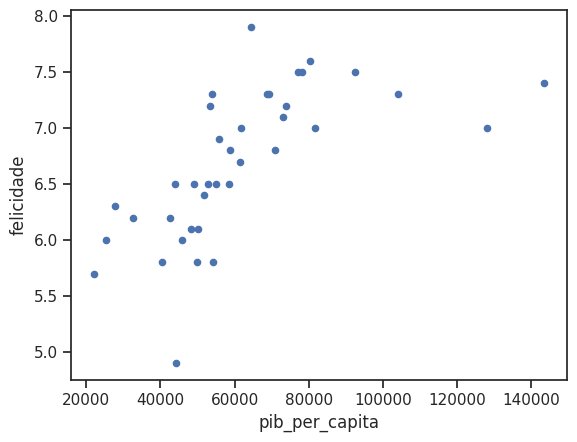

In [93]:
df.plot(kind='scatter', x='pib_per_capita', y='felicidade')

In [94]:
df[['felicidade', 'pib_per_capita']].corr(method='spearman')

,felicidade,pib_per_capita
felicidade,1.000000,0.822229
pib_per_capita,0.822229,1.000000


Categorizando a renda

In [95]:
df['categoria_renda'] = pd.qcut(df['pib_per_capita'], 8, labels=['H', 'G', 'F', 'E', 'D', 'C', 'B', 'A'])
group = df.groupby('categoria_renda', observed=True)
df = group[['felicidade', 'pib_per_capita']].mean().reset_index()
df[['felicidade', 'pib_per_capita']] = df[['felicidade', 'pib_per_capita']].round(2)
df

,categoria_renda,felicidade,pib_per_capita
0,H,6.00,29679.21
1,G,5.94,44910.52
2,F,6.20,50224.54
3,E,6.66,53839.94
4,D,6.78,59271.35
5,C,7.32,68364.68
6,B,7.38,76517.24
7,A,7.24,109968.59


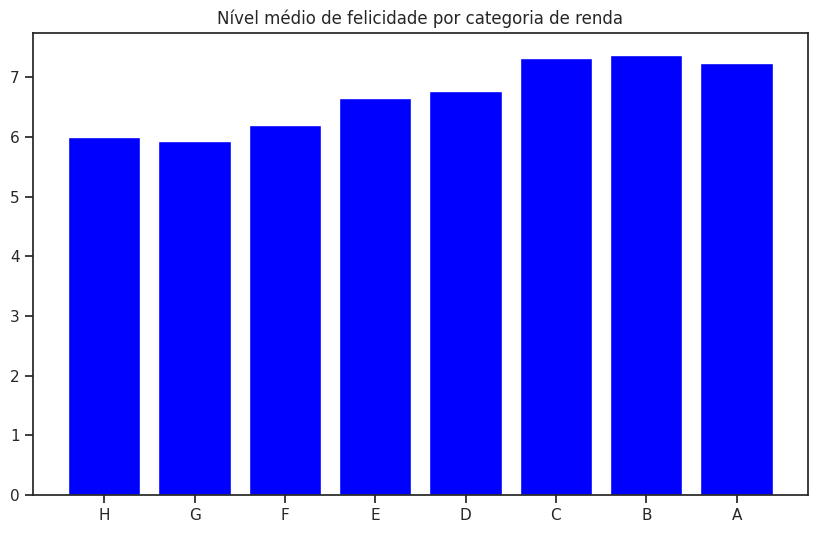

In [96]:
plt.figure(figsize=(10, 6))
plt.bar(df['categoria_renda'], df['felicidade'], color='blue')
# plt.xlabel('Categoria de Renda')
# plt.ylabel('Satisfação com a Vida Média')
plt.title('Nível médio de felicidade por categoria de renda')
plt.show()

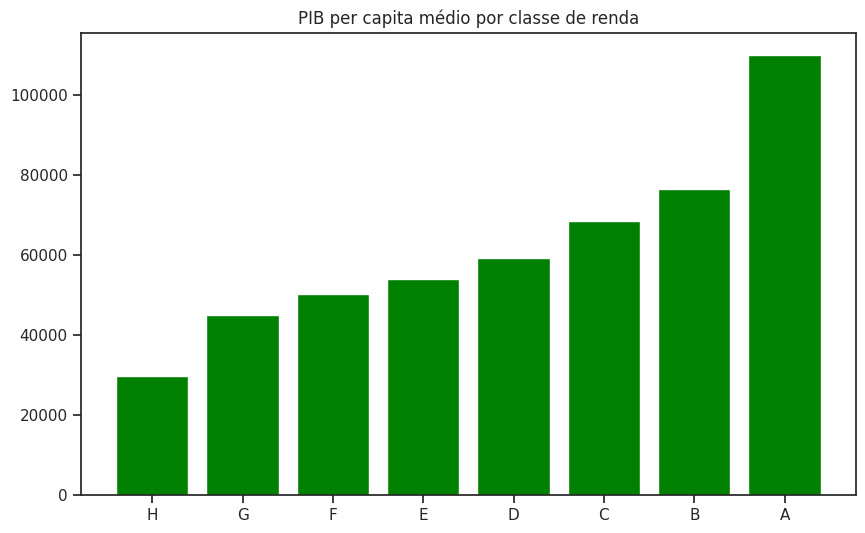

In [97]:
plt.figure(figsize=(10, 6))
plt.bar(df['categoria_renda'], df['pib_per_capita'], color='green')
# plt.xlabel('Categoria de Renda')
# plt.ylabel('Satisfação com a Vida Média')
plt.title('PIB per capita médio por classe de renda')
plt.show()

In [98]:
df = normalize_column(df, 'felicidade')
df = normalize_column(df, 'pib_per_capita')
df

,categoria_renda,felicidade,pib_per_capita,felicidade_norm,pib_per_capita_norm
0,H,6.00,29679.21,0.041667,0.000000
1,G,5.94,44910.52,0.000000,0.189705
2,F,6.20,50224.54,0.180556,0.255891
3,E,6.66,53839.94,0.500000,0.300921
4,D,6.78,59271.35,0.583333,0.368569
5,C,7.32,68364.68,0.958333,0.481825
6,B,7.38,76517.24,1.000000,0.583365
7,A,7.24,109968.59,0.902778,1.000000


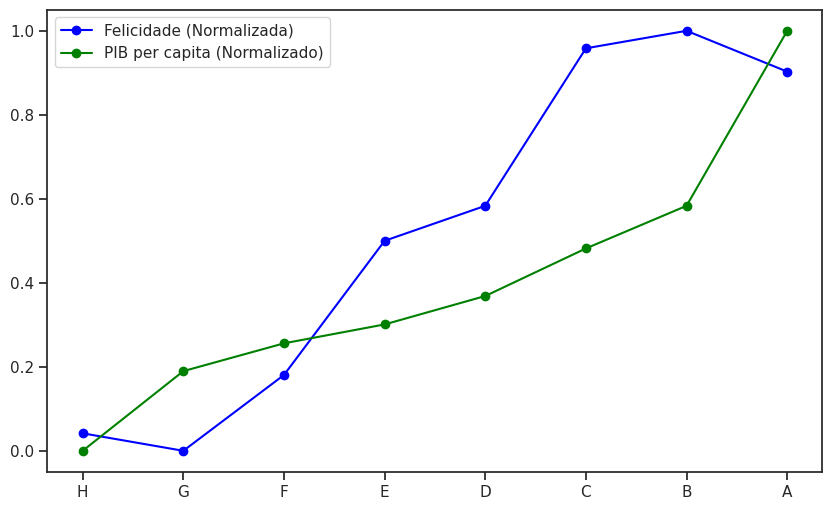

In [104]:
plt.figure(figsize=(10, 6))
plt.plot(df['categoria_renda'], df['felicidade_norm'], marker='o', label='Felicidade (Normalizada)', color='blue')
plt.plot(df['categoria_renda'], df['pib_per_capita_norm'], marker='o', label='PIB per capita (Normalizado)', color='green')
# plt.xlabel('Categoria de Renda')
# plt.ylabel('Valor Normalizado')
# plt.title('Satisfação com a Vida e GDP Normalizados por Categoria de Renda')
plt.legend()
plt.show()